In [1]:
#import relevant modules
import pandas as pd
import numpy as np
import pandas_datareader as data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#create a small function that we can feed a list of stock tickers to to download pricing data
def get_prices(tickers,start):
    prices = data.DataReader(tickers,data_source='yahoo',start=start)['Adj Close']
    return prices

In [7]:
#set the url that we will scrape the Dow 30 ticker information from 
dow = 'https://www.cnbc.com/dow-components/'
 
#read in the url and scrape ticker data
data_table = pd.read_html(dow)

data_table

[   Symbol  Name  Price Unnamed: 3  Change  %Change
 0     AXP   NaN    NaN        ---     NaN      NaN
 1    AAPL   NaN    NaN        ---     NaN      NaN
 2      BA   NaN    NaN        ---     NaN      NaN
 3     CAT   NaN    NaN        ---     NaN      NaN
 4    CSCO   NaN    NaN        ---     NaN      NaN
 5     CVX   NaN    NaN        ---     NaN      NaN
 6    DWDP   NaN    NaN        ---     NaN      NaN
 7     XOM   NaN    NaN        ---     NaN      NaN
 8      GS   NaN    NaN        ---     NaN      NaN
 9      HD   NaN    NaN        ---     NaN      NaN
 10    IBM   NaN    NaN        ---     NaN      NaN
 11   INTC   NaN    NaN        ---     NaN      NaN
 12    JNJ   NaN    NaN        ---     NaN      NaN
 13     KO   NaN    NaN        ---     NaN      NaN
 14    JPM   NaN    NaN        ---     NaN      NaN
 15    MCD   NaN    NaN        ---     NaN      NaN
 16    MMM   NaN    NaN        ---     NaN      NaN
 17    MRK   NaN    NaN        ---     NaN      NaN
 18   MSFT  

In [18]:
#convert ticker column to list
t = data_table[:][0]
#[0]['Symbol'].tolist()
t

,Symbol,Name,Price,Unnamed: 3,Change,%Change
0,AXP,NaN,NaN,---,NaN,NaN
1,AAPL,NaN,NaN,---,NaN,NaN
2,BA,NaN,NaN,---,NaN,NaN
3,CAT,NaN,NaN,---,NaN,NaN
4,CSCO,NaN,NaN,---,NaN,NaN
5,CVX,NaN,NaN,---,NaN,NaN
6,DWDP,NaN,NaN,---,NaN,NaN
7,XOM,NaN,NaN,---,NaN,NaN
8,GS,NaN,NaN,---,NaN,NaN
9,HD,NaN,NaN,---,NaN,NaN


In [19]:
tickers = data_table[:][0]['Symbol'].tolist()
tickers

['AXP',
 'AAPL',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'DWDP',
 'XOM',
 'GS',
 'HD',
 'IBM',
 'INTC',
 'JNJ',
 'KO',
 'JPM',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PFE',
 'PG',
 'TRV',
 'UNH',
 'UTX',
 'VZ',
 'V',
 'WBA',
 'WMT',
 'DIS']

In [20]:
#download daily pricing data for each ticker in the Dow 30
prices = get_prices(tickers,'01/01/2017')
 
#Calculate percentage return over download period
returns = (((prices.iloc[-1] / prices.iloc[0]) - 1) * 100).round(2)

In [21]:
#create a reshaped array of ticker symbols that matches the desired shape of the heatmap
symbol = ((np.asarray(returns.index)).reshape(6,5))
 
#create a reshaped array of percent returns that matches the desired shape of the heatmap
per_change = ((np.asarray(returns)).reshape(6,5))
 
 
#create a new array of the same shape as desired, combining the relevant ticker symbol
#and percentage return data
labels = (np.asarray(["{0} \n {1:.3f}".format(symbol, per_change)
                      for symbol, per_change in zip(symbol.flatten(),
                                               per_change.flatten())])).reshape(6,5)

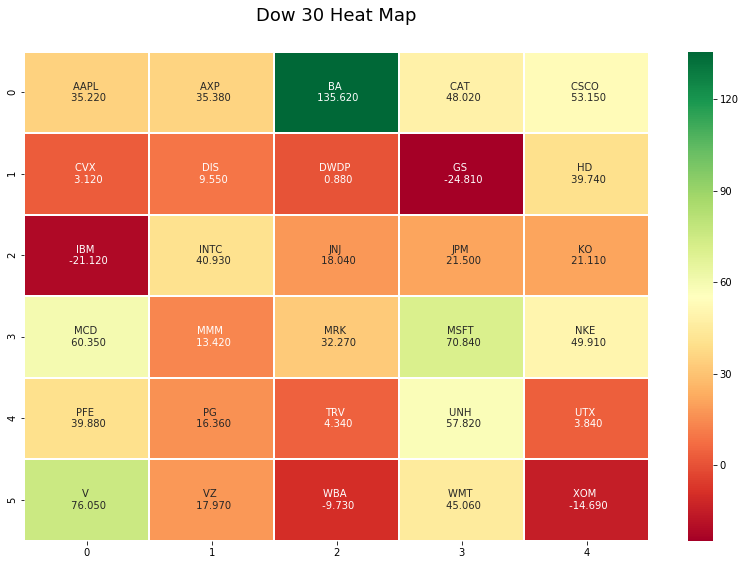

In [30]:
fig, ax = plt.subplots(figsize=(14,9))
plt.title('Dow 30 Heat Map',fontsize=18)
ax.title.set_position([0.5,1.05])
ax.set_xticks([])
sns.heatmap(per_change, annot=labels, fmt="", cmap='RdYlGn', ax=ax,linecolor='white',linewidths=1)
#plt.show()